## Tokenizers

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2023-06-28 14:00:16.221875: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
sentences = pd.read_json('~/Downloads/archive/Sarcasm_Headlines_Dataset_v2.json', lines = True)

In [3]:
sentences.columns

Index(['is_sarcastic', 'headline', 'article_link'], dtype='object')

In [4]:
sentences = sentences[['headline', 'is_sarcastic']]

In [5]:
train, val, test = np.split(sentences.sample(frac = 1), 
                            [int(0.8 * len(sentences)), int(0.9 * len(sentences))])

In [6]:
tokenizer = Tokenizer(oov_token = "OOV")
tokenizer.fit_on_texts(train.headline)
word_index = tokenizer.word_index

In [7]:
train_sequences = tokenizer.texts_to_sequences(train.headline)
train_padded = pad_sequences(train_sequences,
                            padding = 'post')


In [8]:
val_sequences = tokenizer.texts_to_sequences(val.headline)
val_padded = pad_sequences(val_sequences,
                           padding = 'post')

In [9]:
test_sequences = tokenizer.texts_to_sequences(test.headline)
test_padded = pad_sequences(test_sequences,
                            padding = 'post')

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(len(word_index) + 1, 100))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(24, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [11]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

In [12]:
history = model.fit(train_padded, train.is_sarcastic,
                    epochs = 5,
                    validation_data = (val_padded, val.is_sarcastic))

Epoch 1/5
716/716 [==============================] - 29s 40ms/step - loss: 0.6225 - accuracy: 0.6502 - val_loss: 0.4123 - val_accuracy: 0.8281
Epoch 2/5
716/716 [==============================] - 26s 36ms/step - loss: 0.3559 - accuracy: 0.8541 - val_loss: 0.4822 - val_accuracy: 0.8501
Epoch 3/5
716/716 [==============================] - 26s 36ms/step - loss: 0.2577 - accuracy: 0.8995 - val_loss: 0.5168 - val_accuracy: 0.8606
Epoch 4/5
716/716 [==============================] - 26s 37ms/step - loss: 0.2010 - accuracy: 0.9249 - val_loss: 0.5880 - val_accuracy: 0.8585
Epoch 5/5
716/716 [==============================] - 26s 36ms/step - loss: 0.1547 - accuracy: 0.9448 - val_loss: 0.6729 - val_accuracy: 0.8564


In [13]:
import matplotlib.pyplot as plt

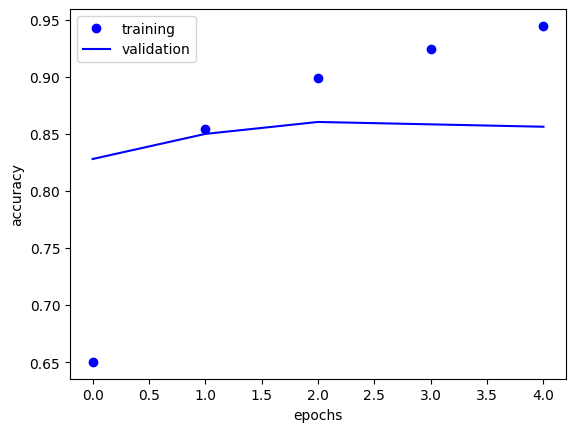

In [14]:
plt.plot(history.history['accuracy'], 'bo')
plt.plot(history.history['val_accuracy'], 'b')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'])
plt.show()

In [15]:
examples = [
    "granny starting to fear spides in the garden might be real",
    "the weather today is bright and sunny"
]

In [16]:
ex_sequences = tokenizer.texts_to_sequences(examples)
ex_padded = pad_sequences(ex_sequences, 
                          padding = 'post')
print(model.predict(ex_padded))

1/1 [==============================] - 0s 376ms/step
[[5.6088990e-01]
 [5.9288854e-12]]
